In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


In [ ]:
df=pd.read_csv('bengaluru_house_prices.csv') #Loading data

In [ ]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [ ]:
df.size

119880

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

DATA CLEANING

In [ ]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
df1=df.drop(['area_type', 'availability', 'balcony','society'],axis=1)  #Removing certain parameters as they are of no use

In [ ]:
df1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df1.shape

(13320, 5)

In [ ]:
df2=df1.dropna()

In [ ]:
df2.shape


(13246, 5)

In [ ]:
df2.isnull().sum() # Dropping since there less null values present

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df2.shape

(13246, 5)

FEATURE ENGINEERING

In [ ]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0])) # making a seperate coulmn for bedrooms as their are diffrent variables present

/tmp/ipython-input-17-2047871736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0])) # making a seperate coulmn for bedrooms as their are diffrent variables present


In [ ]:
df2.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df2[df2['bhk']>15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [ ]:
df2['total_sqft'].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x): # defining a function for float value
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df2[~df2['total_sqft'].apply(is_float)].head(10) # checking for non float values i.e range of total_sqft

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def num(x):   # creating a function where it will take average of range in total_sqft
    y=x.split('-')
    if len(y)==2:
        return(float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
num('20-23')  # input shoukd always be in string otherwise u will not get desired result

21.5

In [ ]:
df3=df2.copy()
df3['total_sqft']=df3.total_sqft.apply(num) # applying the above function


df3.head(50)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3
4,Kothanur,2 BHK,1200.00,2.0,51.00,2
5,Whitefield,2 BHK,1170.00,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.00,6.0,370.00,6


In [ ]:
df4 = df3.copy()
df4['Price_per_sq'] = df4['price'] * 100000 / df4['total_sqft'] # Creating a new column for simplification
df4.head(5)

,location,size,total_sqft,bath,price,bhk,Price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df4['location'].tail(20)

,location
13300,Hosakerehalli
13301,Kothanur
13302,Annaiah Reddy Layout
13303,Vidyaranyapura
13304,Raja Rajeshwari Nagar
13305,Hulimavu
13306,Rajarajeshwari Nagara
13307,Billekahalli
13308,Bannerghatta Road
13309,Yeshwanthpur


In [ ]:
df4.location=df4.location.apply(lambda x: x.strip())

location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [ ]:
len(location_stats[location_stats<=10])

1052

In [ ]:
len(location_stats)

1293

In [ ]:
len(location_stats[location_stats>10])

241

DIMENSIONALITY REDUCTION

In [ ]:
less_than_10=location_stats[location_stats<=10]
less_than_10

,location
location,
Kalkere,10
Sadashiva Nagar,10
BTM 1st Stage,10
Basapura,10
Gunjur Palya,10
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [ ]:
len(df4.location.unique())

1293

In [ ]:
df4.location=df4.location.apply(lambda x: 'other' if x in less_than_10 else x) # The no of  locations which are less than 10 are considred as 'others'
df4.location.head(7)

,location
0,Electronic City Phase II
1,Chikka Tirupathi
2,Uttarahalli
3,Lingadheeranahalli
4,Kothanur
5,Whitefield
6,Old Airport Road


In [ ]:
df4.head(20)

,location,size,total_sqft,bath,price,bhk,Price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


REMOVING OUTLIERS

In [ ]:
df4.head(50)

,location,size,total_sqft,bath,price,bhk,Price_per_sq
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.00,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.00,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.00,6.0,370.00,6,36274.509804


In [ ]:
df4['bhk'].value_counts()

,count
bhk,
2,5527
3,4832
4,1395
1,649
5,353
6,221
7,100
8,89
9,54


In [ ]:
(df4['bhk']>5).value_counts()

,count
bhk,
False,12756
True,490


In [ ]:
df4[df4.total_sqft/df4.bhk<300] # setting our threshold to 300 for each bhk

,location,size,total_sqft,bath,price,bhk,Price_per_sq
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [ ]:
#we cant have 8bhk for 600 sqft , 6bhk for 1407sqt and many more , therefore these r outliersand can be removed¶

In [ ]:
df5=df4[~(df4.total_sqft/df4.bhk<300)] #removing flats with not enough space as outliers

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,Price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889


In [ ]:
#Removing outliers using std and mean

In [ ]:
df5['Price_per_sq'].describe()

,Price_per_sq
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [ ]:
def remove_pps(df):  # defining a function for removing extreme values using mean and std
    df_out=pd.DataFrame()
    for x,y in df.groupby('location'):
        m=np.mean(y.Price_per_sq)
        sd=np.std(y.Price_per_sq)
        reduced_df=y[(y.Price_per_sq>(m-sd))&(y.Price_per_sq<(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [ ]:
df6=remove_pps(df5) #all extreme values are removed

In [ ]:
df6.head(9)

,location,size,total_sqft,bath,price,bhk,Price_per_sq
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667


In [ ]:
df6['Price_per_sq'].describe()

,Price_per_sq
count,10241.000000
mean,5657.702572
std,2266.476980
min,1250.000000
25%,4244.762955
50%,5172.413793
75%,6426.099852
max,24509.803922


In [ ]:
def scatter_plot_bhk(df,location): # plotting 2bhk and 3bhk on graph using scatter plotmatplot
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3 bhk',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

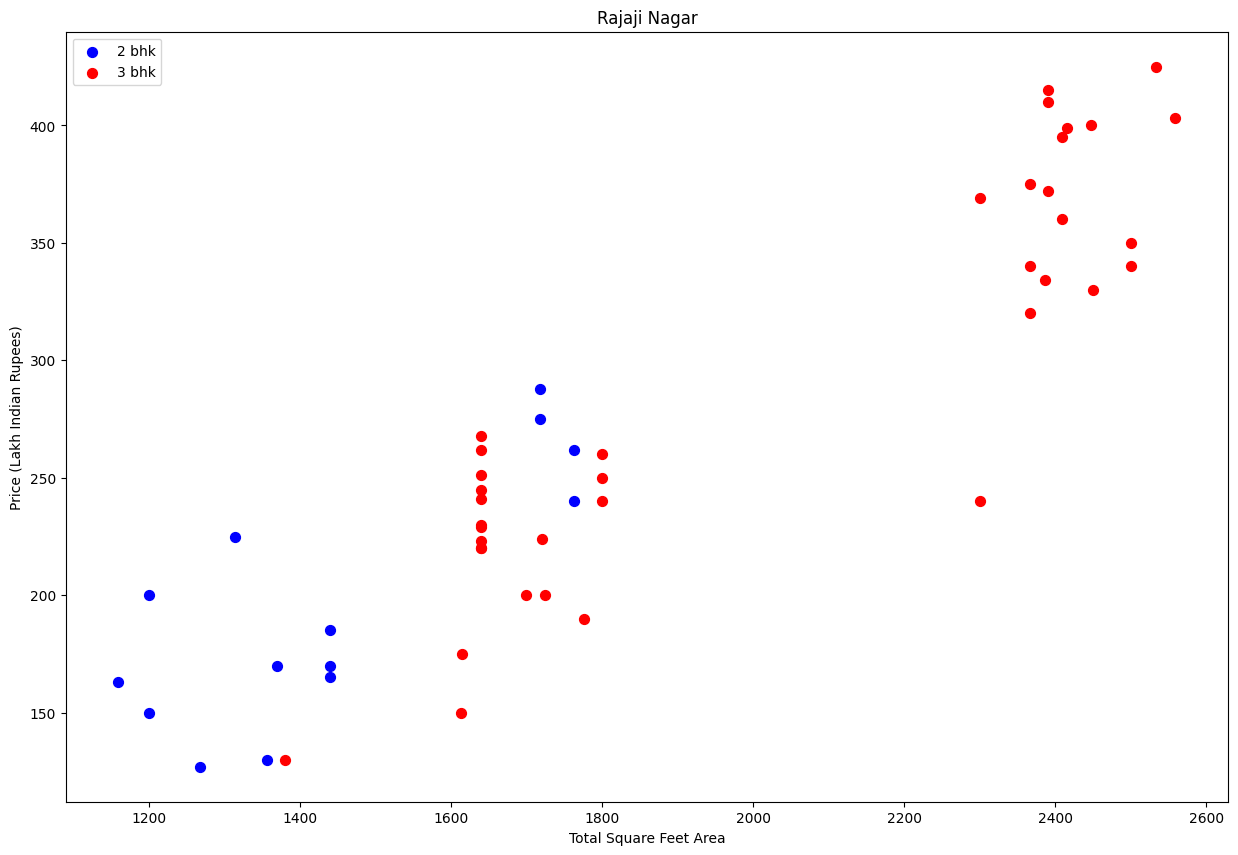

In [ ]:
scatter_plot_bhk(df6,'Rajaji Nagar')

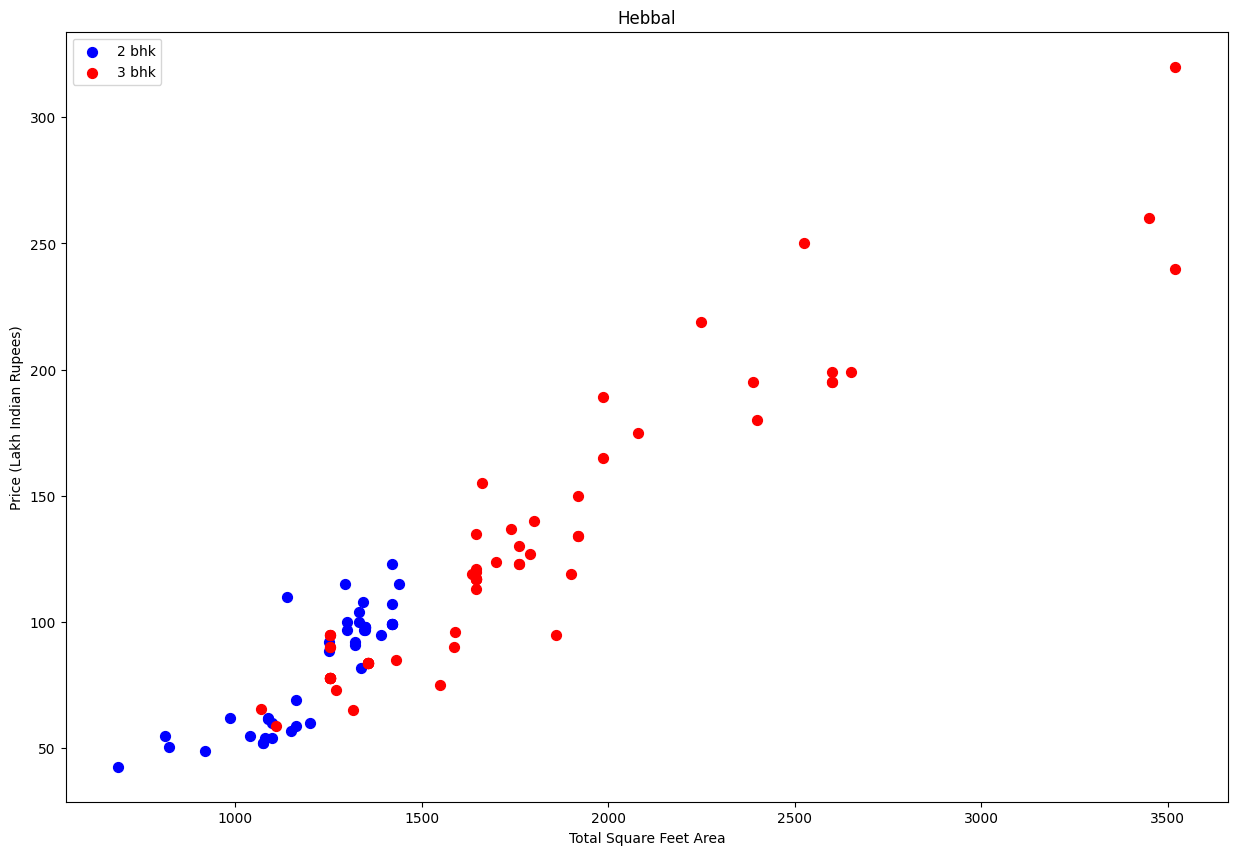

In [ ]:
scatter_plot_bhk(df6,'Hebbal')

In [ ]:
def remove_bhk_outliers(df):   # function which remove outliers i.e it is impossible to have 3bhk price less than 2bhk in same area
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sq),
                'std': np.std(bhk_df.Price_per_sq),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [ ]:
df7=remove_bhk_outliers(df6)

In [ ]:
df7.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sq
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


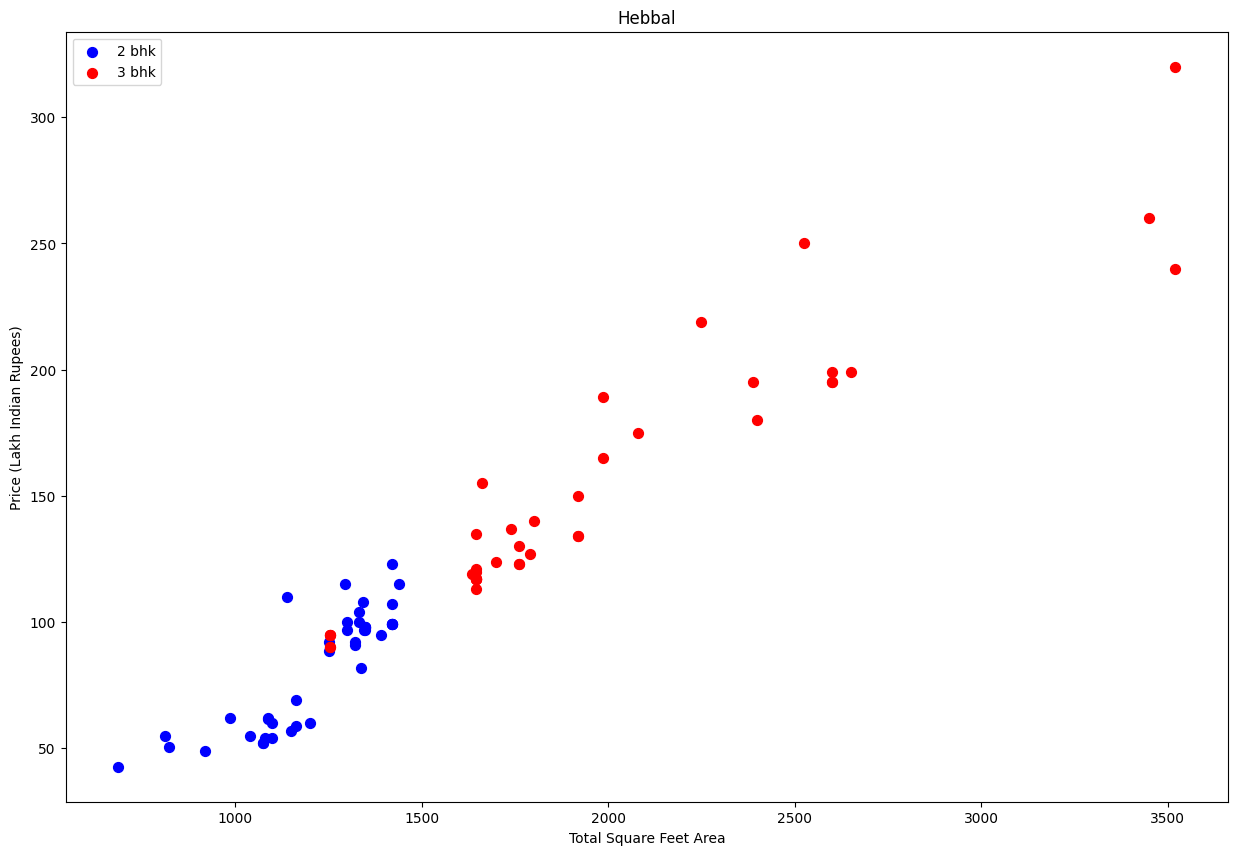

In [ ]:
scatter_plot_bhk(df7,'Hebbal') # After removing outliers we can compare the prices for same location

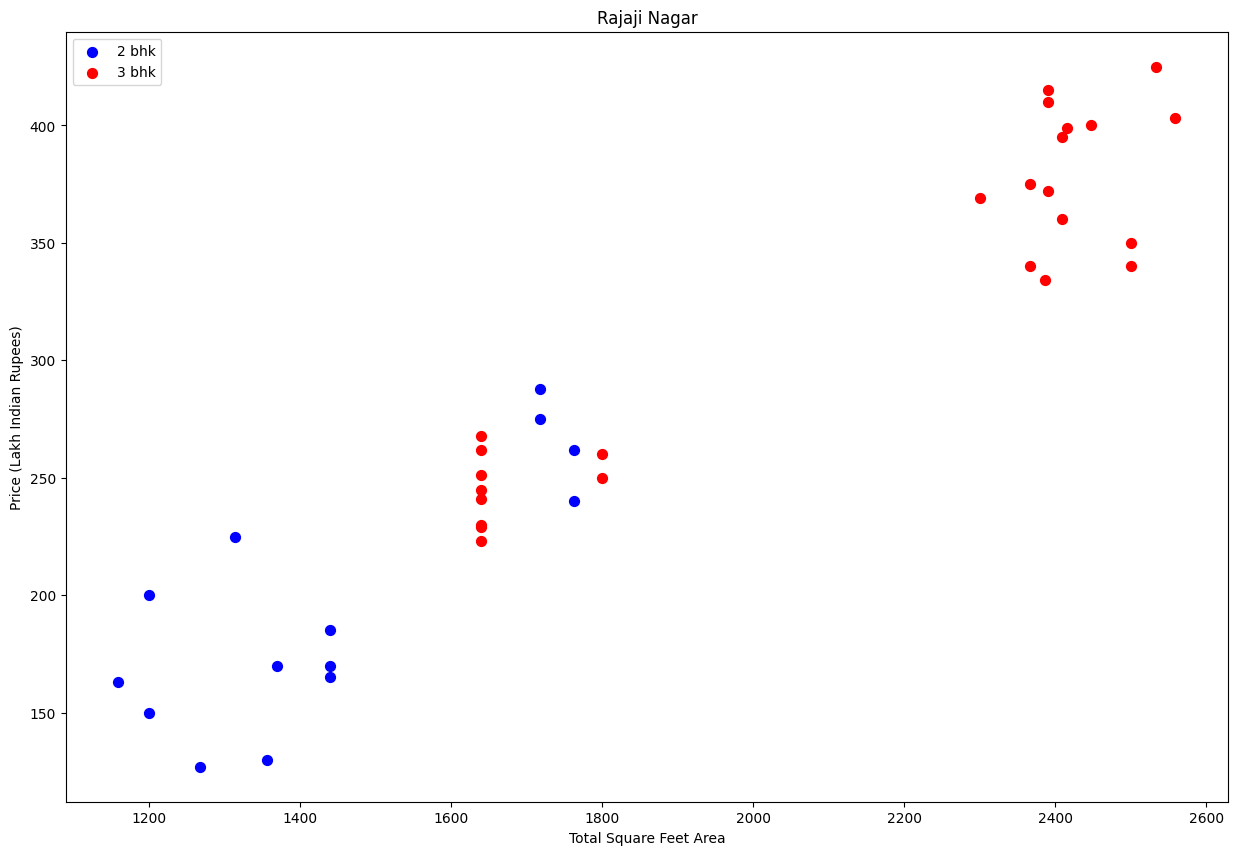

In [ ]:
scatter_plot_bhk(df7,'Rajaji Nagar') # After removing outliers we can compare the prices for same location

Text(0, 0.5, 'count')

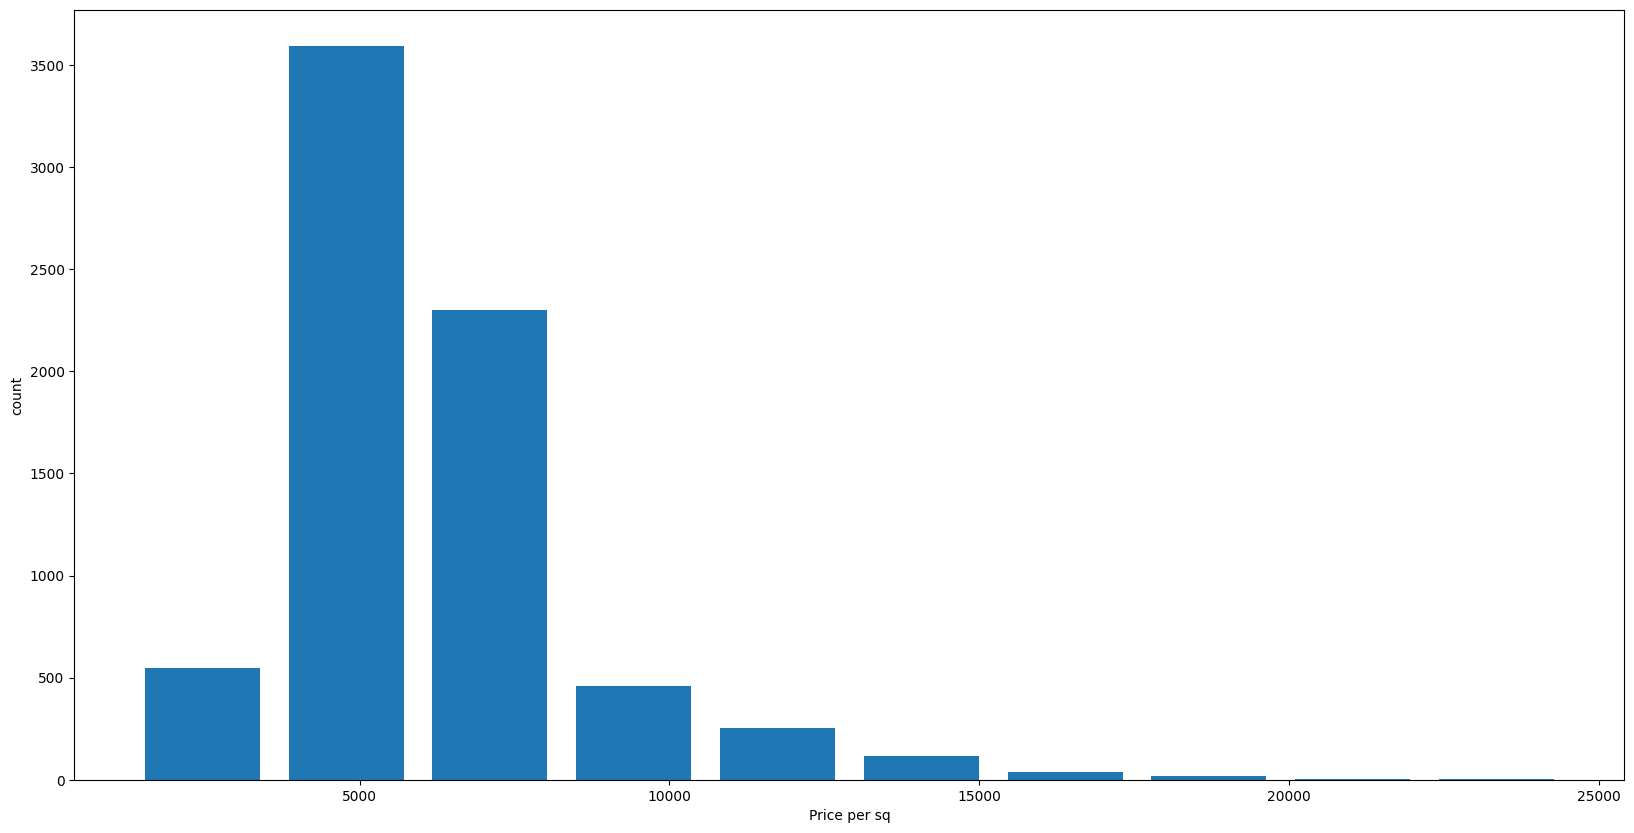

In [ ]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.Price_per_sq,rwidth=0.8)
plt.xlabel('Price per sq')
plt.ylabel('count')


In [ ]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

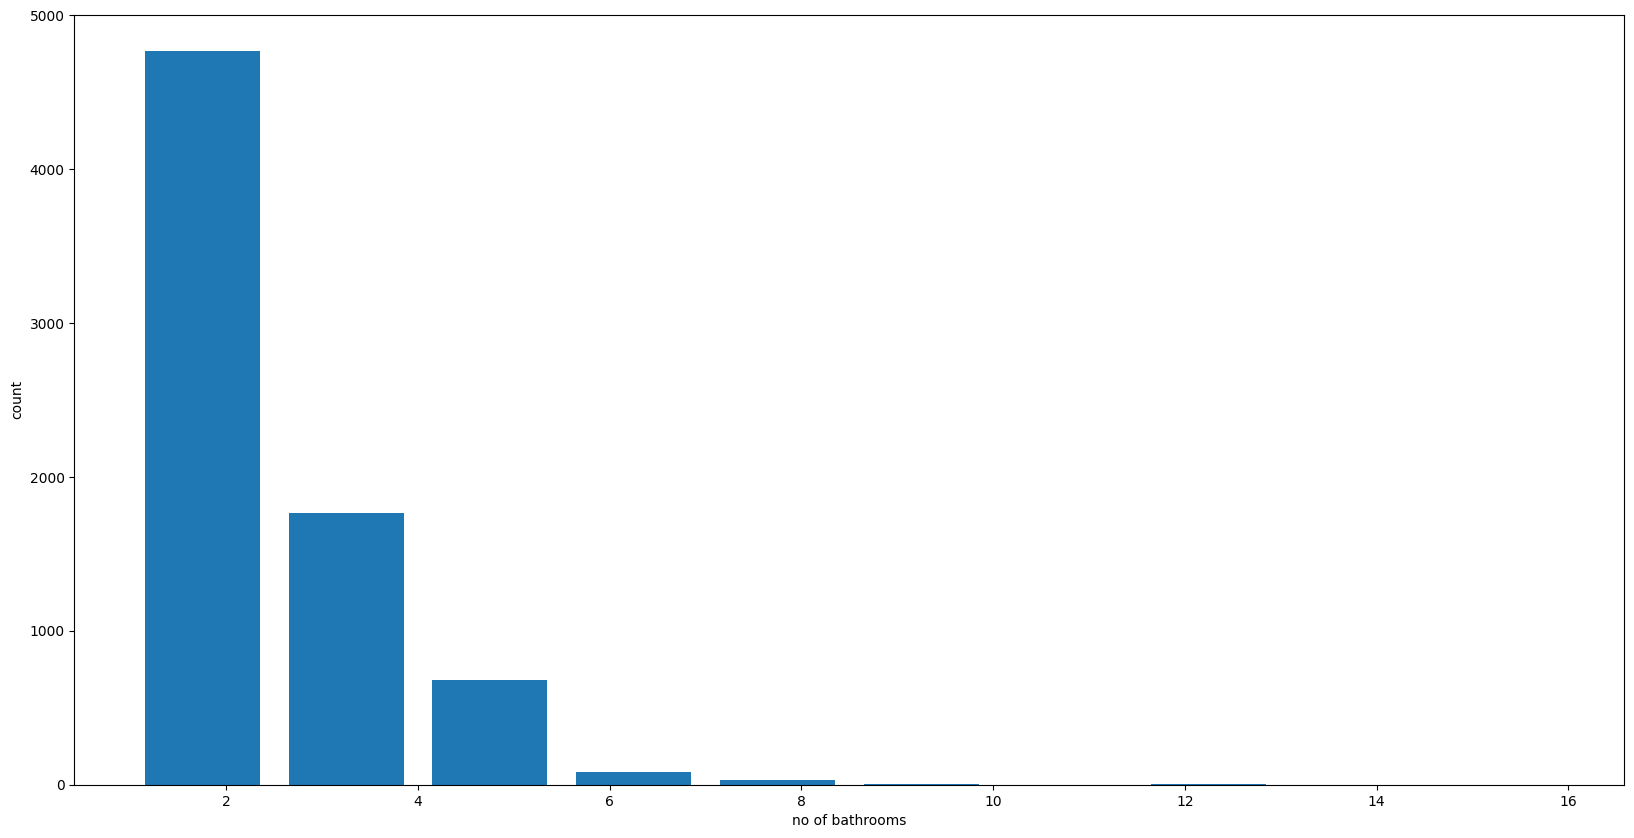

In [ ]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel('no of bathrooms')
plt.ylabel('count')

In [ ]:
df7[df7.bath>5].count() # Checking out no of bathrooms greater than 5 which are outliers as it very rare to have more than 5 in a house

,0
location,122
size,122
total_sqft,122
bath,122
price,122
bhk,122
Price_per_sq,122


In [ ]:
df7[df7.bath>6] #it is unlikely that 6bhk will have 8 bathrooms

,location,size,total_sqft,bath,price,bhk,Price_per_sq
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
293,Abbigere,8 Bedroom,3000.0,8.0,150.0,8,5000.000000
1296,Bommanahalli,8 Bedroom,3000.0,8.0,140.0,8,4666.666667
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
1631,Chikkabanavar,8 Bedroom,4000.0,7.0,110.0,8,2750.000000
2948,Hegde Nagar,6 Bedroom,3000.0,7.0,210.0,6,7000.000000
3028,Hennur Road,8 Bedroom,5000.0,8.0,250.0,8,5000.000000
3245,Horamavu Banaswadi,6 Bedroom,3800.0,8.0,200.0,6,5263.157895
3517,Indira Nagar,8 Bedroom,3250.0,8.0,600.0,8,18461.538462


In [ ]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,Price_per_sq
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df7.shape

(7329, 7)

In [ ]:
df8=df7[df7.bath<df7.bhk+1] # Removing bathroom outlier where bathrooms shoud be equal to bhk
df8.head(10)

,location,size,total_sqft,bath,price,bhk,Price_per_sq
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
12,1st Phase JP Nagar,3 BHK,2059.0,3.0,225.0,3,10927.634774


In [ ]:
df8.shape

(6871, 7)

In [ ]:
df9=df8.drop(['size','Price_per_sq'],axis=1)
df9.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
#BINNING

binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df9['price_bin'] = binner.fit_transform(df9[['price']])

# Group by bins and calculate target sample size
target_count = df9['price_bin'].value_counts().median()

balanced_dfs = []
for bin_num in df9['price_bin'].unique():
    bin_df = df9[df9['price_bin'] == bin_num]
    if len(bin_df) < target_count:
        bin_df = bin_df.sample(int(target_count), replace=True, random_state=42) # Oversample minority bins
    else:
        bin_df = bin_df.sample(int(target_count), random_state=42) # Undersample majority bins
    balanced_dfs.append(bin_df)

In [ ]:
df_balanced = pd.concat(balanced_dfs)
df_balanced = df_balanced.drop('price_bin', axis=1)


In [ ]:
dummy=pd.get_dummies(df_balanced.location)
dummy.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
4726,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5773,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4929,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9254,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6719,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df10=pd.concat([df_balanced,dummy.drop('other',axis=1)],axis=1) # making dummies for location and then removing 'location' column
df10.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4726,Kumaraswami Layout,3200.0,7.0,150.0,7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5773,Rajaji Nagar,2367.0,3.0,375.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4929,Malleshwaram,2215.0,3.0,275.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9254,other,1235.0,2.0,140.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6719,Thanisandra,1917.0,4.0,130.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df11=df10.drop('location',axis=1)
df11.head(4)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4726,3200.0,7.0,150.0,7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5773,2367.0,3.0,375.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4929,2215.0,3.0,275.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9254,1235.0,2.0,140.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


MODELLING


In [ ]:
X=df11.drop(['price'],axis=1) #input
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4726,3200.0,7.0,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5773,2367.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4929,2215.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y=df11.price #output
y.head(3)

,price
4726,150.0
5773,375.0
4929,275.0


In [ ]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
# Create and evaluate individual models

estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('svr', SVR())
]


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

print("Individual Model Performances:")
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name}: {score:.4f}")

# Create stacking regressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=5
)

# Fit and evaluate stacking model
stacking_regressor.fit(X_train, y_train)
stacking_score = stacking_regressor.score(X_test, y_test)
print(f"\nStacking Regressor R2 Score: {stacking_score:.4f}")

# Hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100],
    'gb__n_estimators': [50, 100],
    'svr__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(
    estimator=stacking_regressor,
    param_grid=param_grid,
    cv=3,  # Reduced for speed
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_stacking_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best stacking score:", grid_search.best_score_)

# Comparing all models
final_models = {
    **models,
    'Basic Stacking': stacking_regressor,
    'Tuned Stacking': best_stacking_model
}

print("\nFinal Model Comparison:")
best_score = -1
best_model_name = ""
best_model = None

for name, model in final_models.items():
    score = model.score(X_test, y_test)
    print(f"{name}: {score:.4f}")
    if score > best_score:
        best_score = score
        best_model_name = name
        best_model = model

print(f"\nBest model: {best_model_name} with R2 score: {best_score:.4f}")



Individual Model Performances:
Linear Regression: 0.8256
Random Forest: 0.8032
Gradient Boosting: 0.8324
SVR: 0.6362

Stacking Regressor R2 Score: 0.8367
Best parameters: {'gb__n_estimators': 50, 'rf__n_estimators': 50, 'svr__C': 10}
Best stacking score: 0.8296841659657023

Final Model Comparison:
Linear Regression: 0.8256
Random Forest: 0.8032
Gradient Boosting: 0.8324
SVR: 0.6362
Basic Stacking: 0.8367
Tuned Stacking: 0.8358

Best model: Basic Stacking with R2 score: 0.8367


In [ ]:
outer=best_model
print(outer)

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('svr', SVR())],
                  final_estimator=LinearRegression())


TESTING MODEL

In [ ]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return best_model.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


np.float64(86.31196959661398)

In [ ]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


np.float64(167.98176885414637)

In [ ]:
!pip install gradio --quiet



In [ ]:
import pickle

# Save the best model (tuned stacking)
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save the column names (X.columns)
columns = X.columns.tolist()
with open("columns.pkl", "wb") as f:
    pickle.dump(columns, f)




In [89]:

import gradio as gr
import pickle
import numpy as np

# Load saved model and column names
with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("columns.pkl", "rb") as f:
    columns = pickle.load(f)

# Extract list of location names (everything after the first 3 features)
locations = [col for col in columns if col not in ['total_sqft', 'bath', 'bhk']]

# Define prediction function
def predict_price(location, sqft, bath, bhk):
    try:
        loc_index = columns.index(location.lower())
    except:
        loc_index = -1

    x = np.zeros(len(columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    predicted_price = best_model.predict([x])[0]
    return round(predicted_price, 2)

# Gradio UI
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(locations, label="Location"),
        gr.Number(label="Total Square Feet"),
        gr.Number(label="Number of Bathrooms"),
        gr.Number(label="BHK (Bedrooms)")
    ],
    outputs=gr.Number(label="Predicted Price (in Lakhs)"),
    title="🏠 Real Estate Price Predictor",
    description="Enter details of the property to estimate the price using a Tuned Stacking Model"
)


interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ea124018a68314d990.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
